In [1]:
import pandas as pd
import pymysql
from sqlalchemy.orm import sessionmaker
from sqlalchemy import create_engine
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

warnings.filterwarnings("ignore")
plt.style.use ('ggplot')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 7.5
plt.rcParams['axes.unicode_minus'] = False

In [2]:
username = "multi"
password = "Campus123!"
hostname = "ec2-15-152-211-160.ap-northeast-3.compute.amazonaws.com"
database_name = "Data_Warehouse"

engine = create_engine(
    "mysql+pymysql://{user}:{pw}@{host}/{db}".format(
        user=username, pw=password, db=database_name, host=hostname
    )
)

credit_data_temp = pd.read_sql("SELECT * FROM credit_data_temp", con=engine)
engine.dispose()

In [3]:
credit_data_temp.head()

,corp,stock_code,sector,year,ebitda_margin,ebitda_to_interest_expense,debt_ratio,dependence_on_net_borrowings,net_borrowings_to_ebitda,sales_revenue,...,current_liabilities,working_capital,current_liabilities_ratio,quick_assets,quick_ratio,cash_and_cash_equivalents,short_term_borrowings,days_sales_outstanding,average_accounts_receivable_per_sales_turnover,market_capitalization
0,AJ네트웍스,095570,서비스업,2018,-4.725704,-1.234647,0.809017,0.908094,-7.956088,1.045526e+12,...,6.744550e+11,-4.056966e+11,2.509522,2.173016e+11,0.322188,5.350986e+10,2.576830e+11,28.229726,0.077342,4.218689e+11
1,AJ네트웍스,095570,서비스업,2019,10.702041,1.892100,0.807381,1.318538,3.129399,1.000259e+12,...,7.960628e+11,-3.172633e+11,1.662622,4.201700e+11,0.527810,1.229862e+11,2.914673e+11,38.295192,0.104918,4.654136e+11
2,AJ네트웍스,095570,서비스업,2020,-2.122140,-0.413773,0.818654,1.757330,-23.579500,8.719561e+11,...,6.611604e+11,-4.126050e+11,2.660012,2.148907e+11,0.325021,6.980674e+10,2.626708e+11,35.567225,0.097444,4.321698e+11
3,AJ네트웍스,095570,서비스업,2021,2.270003,0.635416,0.732474,0.857801,10.126826,9.819477e+11,...,5.251768e+11,-2.512639e+11,1.917313,2.541772e+11,0.483984,8.523202e+10,1.132903e+11,34.662551,0.094966,5.066172e+11
4,AJ네트웍스,095570,서비스업,2022,2.287604,0.608433,0.755721,0.759713,5.175620,1.208368e+12,...,8.143649e+11,-5.128953e+11,2.701317,2.764449e+11,0.339461,1.318614e+11,2.094816e+11,28.684293,0.078587,5.356471e+11


In [4]:
# 피쳐별 극단값 3개씩(0.001%) 제거

columns_to_process = credit_data_temp.columns[4:]
processed_data = credit_data_temp.iloc[:, :4].copy()

for column in columns_to_process:
    sorted_column = credit_data_temp[column].sort_values()
    processed_column = sorted_column.iloc[3:-3]
    processed_data[column] = processed_column

processed_data.dropna(inplace=True)
processed_data.head()

,corp,stock_code,sector,year,ebitda_margin,ebitda_to_interest_expense,debt_ratio,dependence_on_net_borrowings,net_borrowings_to_ebitda,sales_revenue,...,current_liabilities,working_capital,current_liabilities_ratio,quick_assets,quick_ratio,cash_and_cash_equivalents,short_term_borrowings,days_sales_outstanding,average_accounts_receivable_per_sales_turnover,market_capitalization
0,AJ네트웍스,095570,서비스업,2018,-4.725704,-1.234647,0.809017,0.908094,-7.956088,1.045526e+12,...,6.744550e+11,-4.056966e+11,2.509522,2.173016e+11,0.322188,5.350986e+10,2.576830e+11,28.229726,0.077342,2.109344e+11
1,AJ네트웍스,095570,서비스업,2019,10.702041,1.892100,0.807381,1.318538,3.129399,1.000259e+12,...,7.960628e+11,-3.172633e+11,1.662622,4.201700e+11,0.527810,1.229862e+11,2.914673e+11,38.295192,0.104918,2.327068e+11
2,AJ네트웍스,095570,서비스업,2020,-2.122140,-0.413773,0.818654,1.757330,-23.579500,8.719561e+11,...,6.611604e+11,-4.126050e+11,2.660012,2.148907e+11,0.325021,6.980674e+10,2.626708e+11,35.567225,0.097444,2.160849e+11
3,AJ네트웍스,095570,서비스업,2021,2.270003,0.635416,0.732474,0.857801,10.126826,9.819477e+11,...,5.251768e+11,-2.512639e+11,1.917313,2.541772e+11,0.483984,8.523202e+10,1.132903e+11,34.662551,0.094966,2.533086e+11
4,AJ네트웍스,095570,서비스업,2022,2.287604,0.608433,0.755721,0.759713,5.175620,1.208368e+12,...,8.143649e+11,-5.128953e+11,2.701317,2.764449e+11,0.339461,1.318614e+11,2.094816e+11,28.684293,0.078587,2.678235e+11


In [5]:
print(f"원본 데이터 shape: {credit_data_temp.shape}")
print(f"극단치 제거후 데이터 shape: {processed_data.shape}")

원본 데이터 shape: (3097, 40)
극단치 제거후 데이터 shape: (3001, 40)


In [6]:
print(processed_data.info())
print(processed_data.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3001 entries, 0 to 3096
Data columns (total 40 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   corp                                            3001 non-null   object 
 1   stock_code                                      3001 non-null   object 
 2   sector                                          3001 non-null   object 
 3   year                                            3001 non-null   object 
 4   ebitda_margin                                   3001 non-null   float64
 5   ebitda_to_interest_expense                      3001 non-null   float64
 6   debt_ratio                                      3001 non-null   float64
 7   dependence_on_net_borrowings                    3001 non-null   float64
 8   net_borrowings_to_ebitda                        3001 non-null   float64
 9   sales_revenue                                 

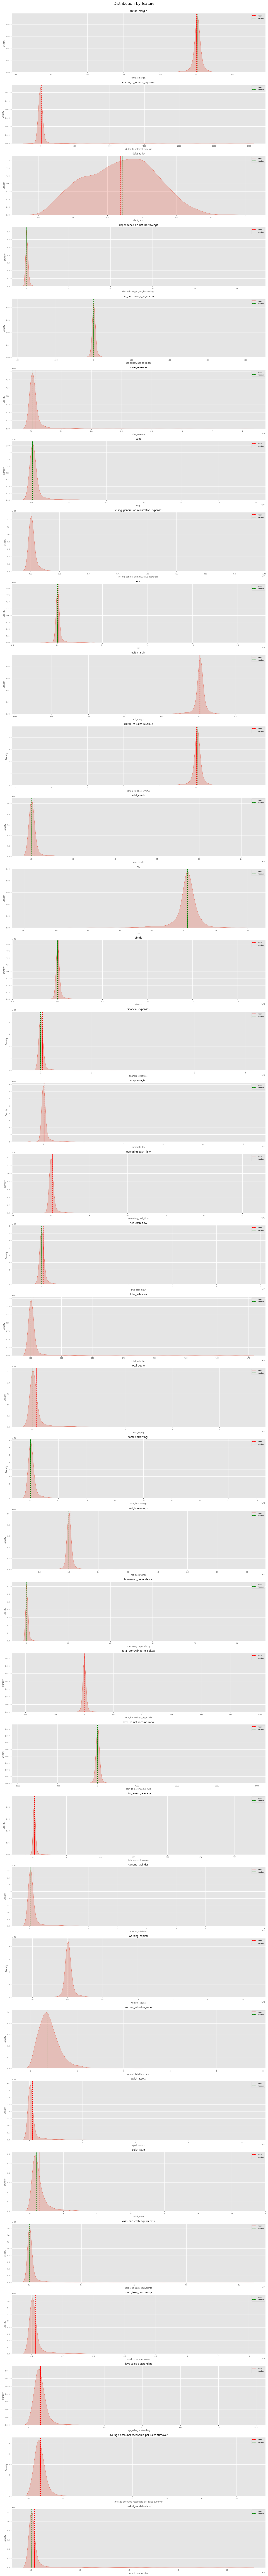

In [7]:
# 칼럼별 분포 확인
columns_to_plot = processed_data.columns[4:]

num_rows = len(columns_to_plot)

fig, axes = plt.subplots(nrows=num_rows, figsize=(15, 4*num_rows))
fig.suptitle('Distribution by feature', y=1, fontsize=16)

for i, column in enumerate(columns_to_plot):
    sns.kdeplot(processed_data[column], fill=True, ax=axes[i])

    mean_value = processed_data[column].mean()
    median_value = processed_data[column].median()

    axes[i].axvline(mean_value, color='r', linestyle='--', label='Mean')
    axes[i].axvline(median_value, color='g', linestyle='--', label='Median')

    axes[i].set_title(column)

    axes[i].legend()

plt.tight_layout()

plt.show()

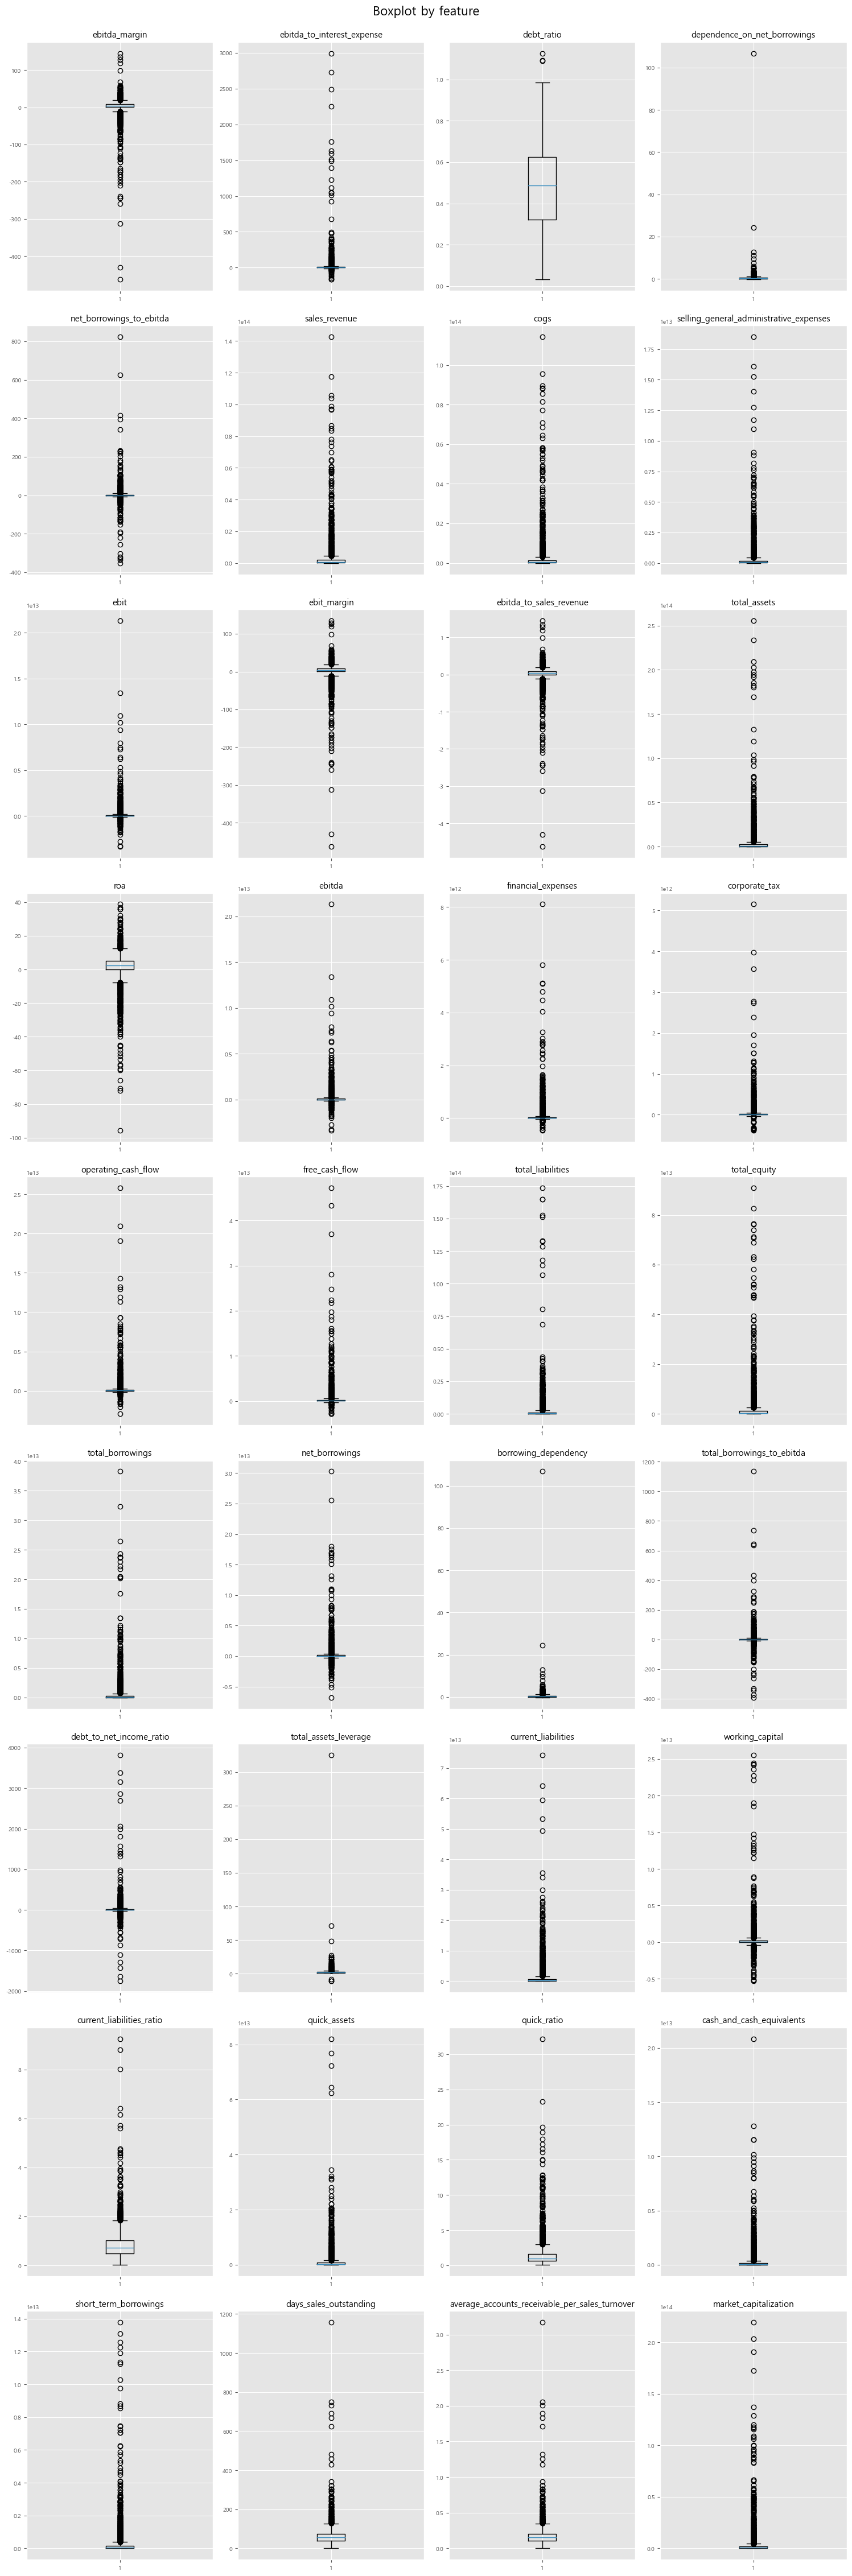

In [8]:
# 칼럼별 박스 플랏 확인
num_columns = 4
num_rows = (len(processed_data.columns) - 4) // num_columns + 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5*num_rows))

axes = axes.flatten()

for i, column in enumerate(processed_data.columns[4:]):
    axes[i].boxplot(processed_data[column])
    axes[i].set_title(column)
    
fig.suptitle('Boxplot by feature', y=1, fontsize=16)

for j in range(len(processed_data.columns[4:]), num_rows * num_columns):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

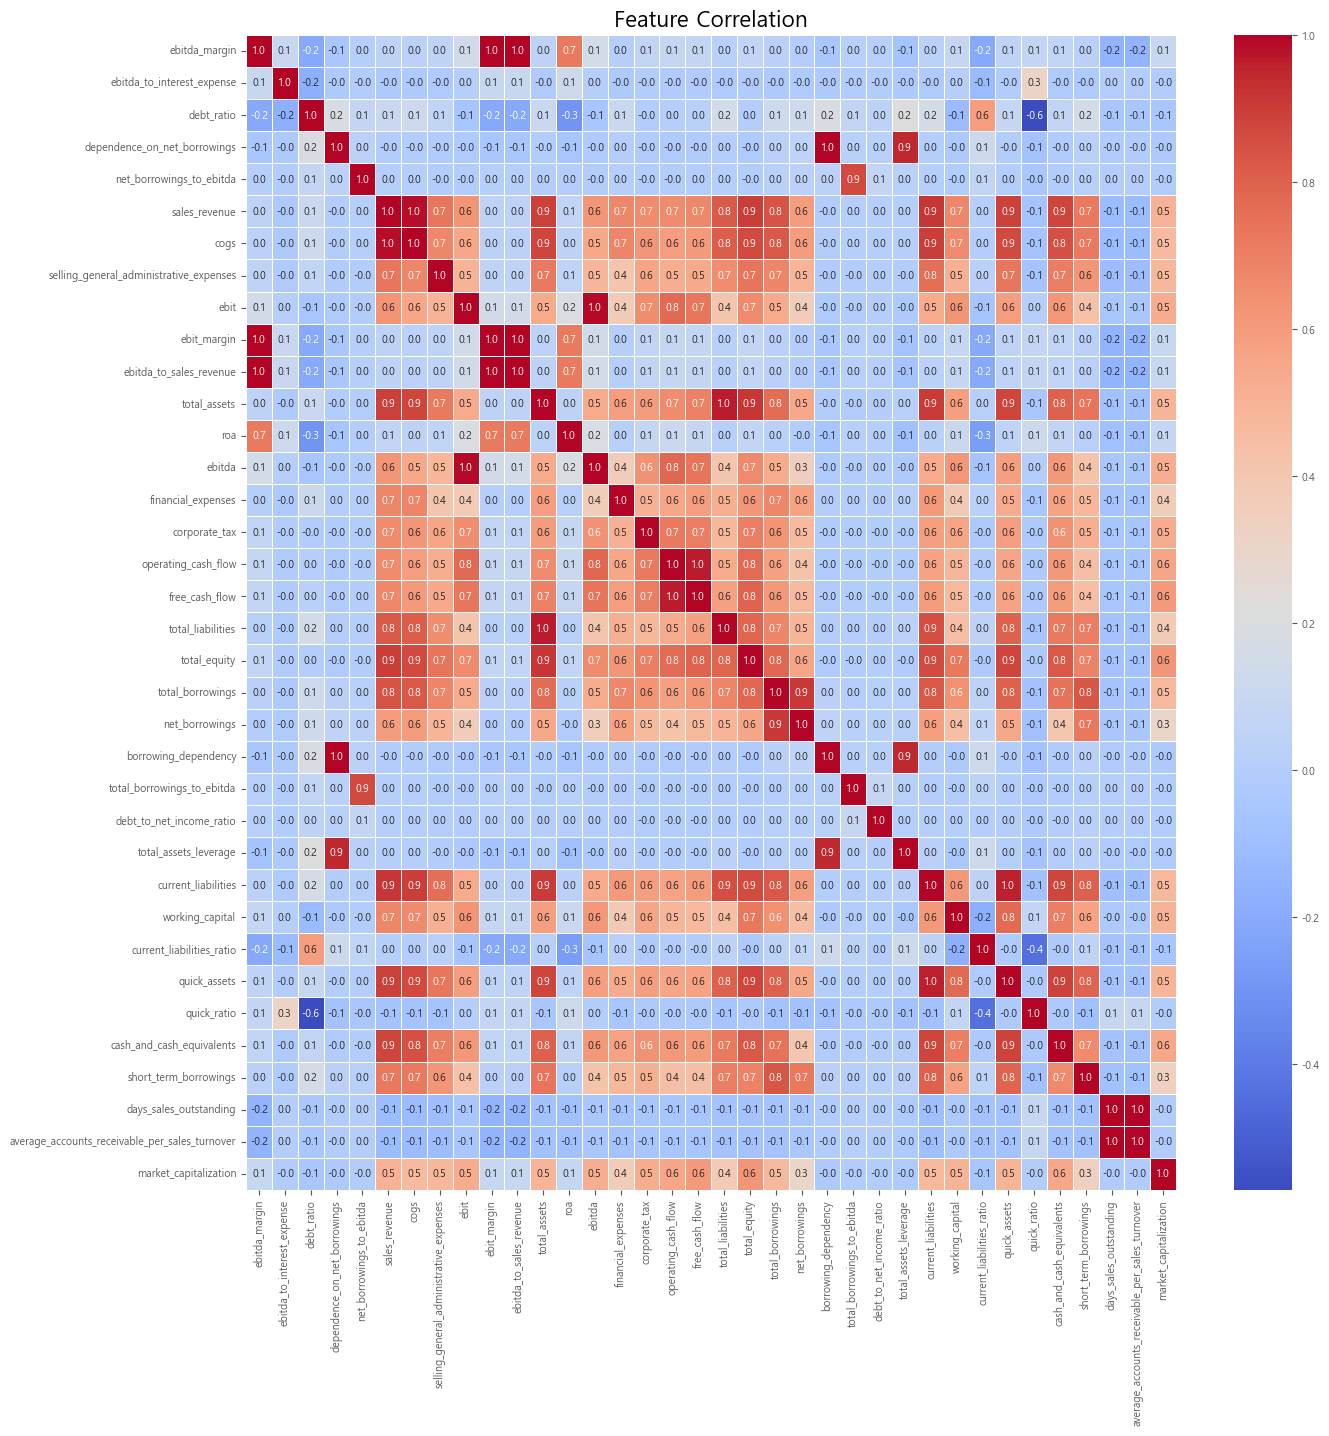

In [5]:
# 상관관계 확인
columns_to_correlate = processed_data.columns[4:]
subset_df = processed_data[columns_to_correlate]

f, ax = plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(subset_df.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax, cmap='coolwarm')
heatmap.set_title('Feature Correlation', fontsize=16)
plt.show()